# **STANDARD NOTEBOOK TO GET RESULTS**

## 1. Clean the Data

In [1]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [7]:
import warnings 
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
lookback_window_0 = [4714, 4774] ## year 2019
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 10
number_of_window=2
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)
######################################################################################################################################################

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=0.01)

1.0151251229377753
step 1
1.0141661039363772
step 2


AttributeError: 'list' object has no attribute 'pct_change'

In [6]:
import warnings 
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
lookback_window_0 = [4714, 4774] ## year 2019
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)
######################################################################################################################################################

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=0.01)

1.014123828240608
step 1
1.0131526065021177
step 2
1.0157148043417445
step 3
1.0254867546865751
step 4
1.031867839333777
step 5
1.037005261290449
step 6
1.0434632095411902
step 7
1.0430387394764802
step 8
1.045375603973273
step 9
1.0453624317074122
step 10
1.0418976313767212
step 11
1.04360340507138
step 12
1.0414016231501353
step 13
1.043533778672651
step 14
1.031970179723098
step 15
1.03143314283725
step 16
1.03285057238969
step 17
1.0354799360340707
step 18
1.0374908499465325
step 19
1.0349297744479686
step 20
1.0306543434341082
step 21
1.0371700567977304
step 22
1.0341183566559151
step 23
1.0321385090356858
step 24
1.0282565680403388
step 25
1.0303795966375782
step 26
1.0293081976293668
step 27
1.0305980043599978
step 28
1.03859475096826
step 29
1.0397378612140358
step 30
1.040346188945704
step 31
1.0374986020217551
step 32
1.0315528523708504
step 33
1.0380437183391396
step 34
1.0305123032175751
step 35
1.0167409819237434
step 36
1.0174660990282693
step 37
1.0187796100630409
step 3

KeyboardInterrupt: 

## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [11]:
year = '2018'
clustering_method = 'SPONGE'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}.csv', index=False)


## 4. Get SP500 data for comparison

In [3]:
start_date = '2018-01-01'
end_date = '2018-12-31'

sp500_PnL = process.get_sp500_PnL(start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

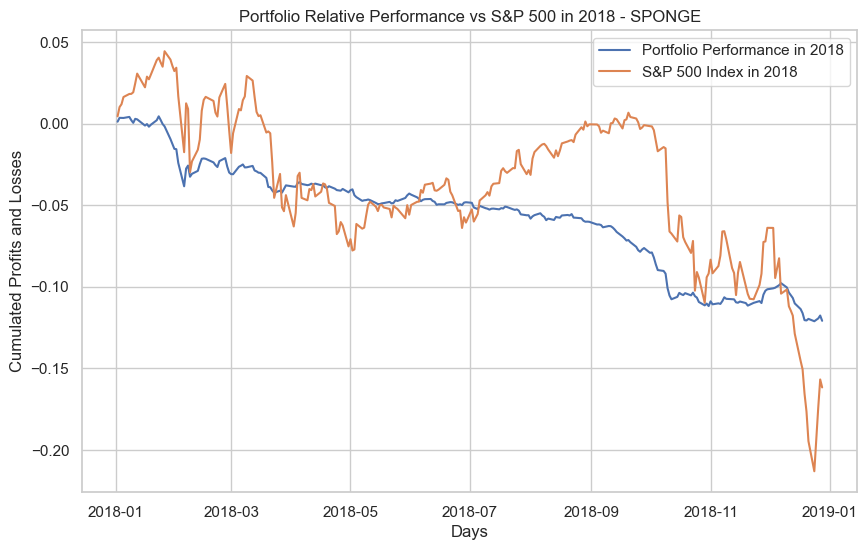

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

year = '2018'

# Calculate the cumulative returns
portfolio_cumulative = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=sp500_PnL.cumsum(), label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

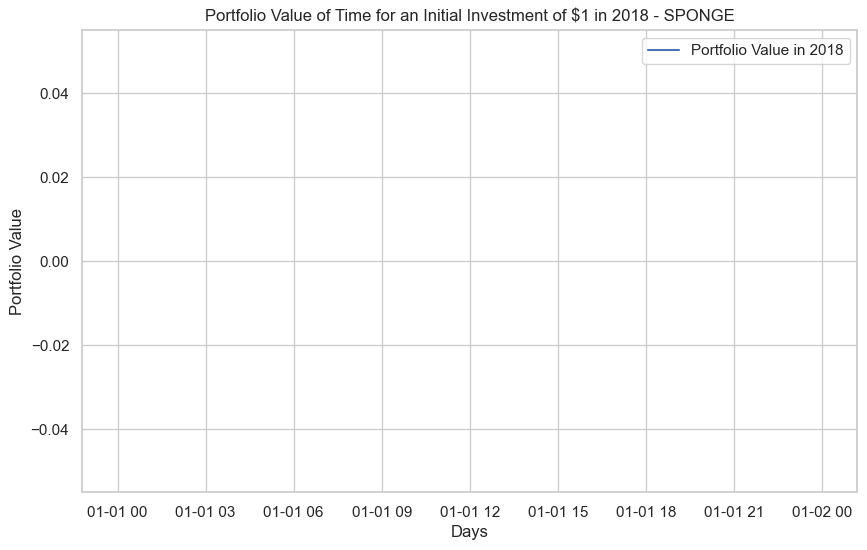

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

# 7. Barplot Daily PnL vs SP500

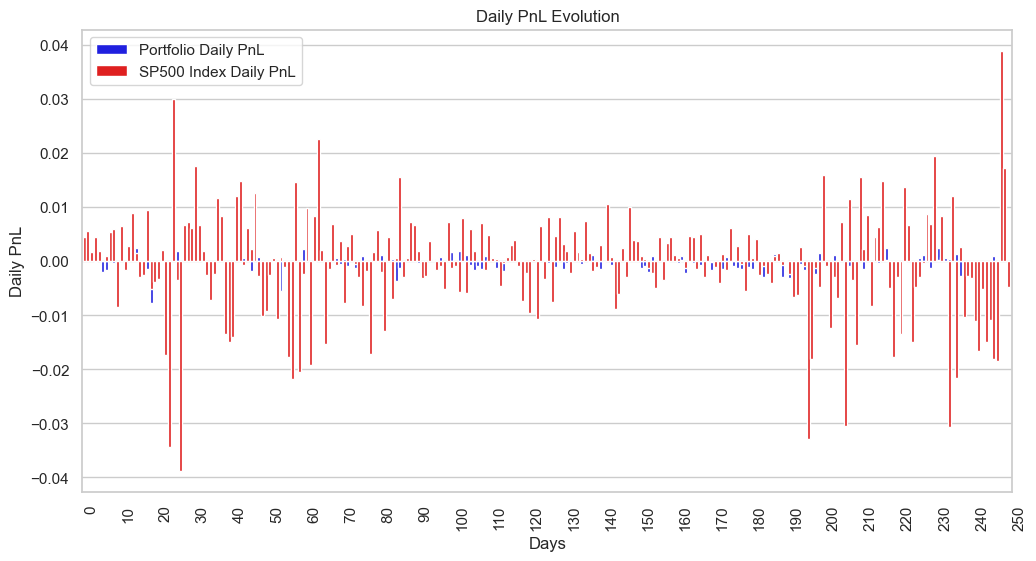

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title('Daily PnL Evolution')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate the cumulative returns
portfolio_cumulative_SL = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['Signed Laplacian Portfolio Performance in 2017'], data=PnL)
portfolio_cumulative_SPONGE = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=['SPONGE Portfolio Performance in 2017'], data=PnL_SPONGE.values)

# Combine dataframes for seaborn plotting
combined_df = pd.concat([portfolio_cumulative_SL, portfolio_cumulative_SPONGE, sp500_PnL.cumsum()], axis=1)
combined_df.columns = ['Signed Laplacian', 'SPONGE', 'S&P 500 Index in 2017']

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'green'])
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title('Portfolio Relative Performance vs S&P 500 in 2017')
plt.legend()
plt.show()